In [1]:
import statsmodels.api as sm
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
import traceback
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## 현차주가

In [57]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '43399',
'smlID': '1310778',
'header': '005380 Historical Data',
'st_date': '01/08/2003',
#'st_date': '11/18/2019',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
raw = req.post(url, headers = head, data = payload)
raw.status_code
soup = BeautifulSoup(raw.text)
hyundai = pd.read_html(str(soup.find('table')))[0]
#yraw1.to_excel(excel_writer=r'C:\Users\com\MSB535\data\대한항공주가.xlsx')
#13년 8월 주가정보 없음.

## 코스피주가

In [58]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '37426',
'smlID': '2055174',
'header': 'KOSPI Historical Data',
'st_date': '01/08/2003',
#'st_date': '11/18/2019',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
raw = req.post(url, headers = head, data = payload)
raw.status_code
soup = BeautifulSoup(raw.text)
kospi = pd.read_html(str(soup.find('table')))[0]
#yraw1.to_excel(excel_writer=r'C:\Users\com\MSB535\data\대한항공주가.xlsx')
#13년 8월 주가정보 없음.

In [59]:
hyundai.tail()

,Date,Price,Open,High,Low,Vol.,Change %
191,Jan 04,49700,51300,54500,49650,23.73M,-1.58%
192,Dec 03,50500,45800,51200,44700,20.92M,10.75%
193,Nov 03,45600,39450,46100,39050,29.97M,15.59%
194,Oct 03,39450,32400,39850,32100,31.17M,19.18%
195,Sep 03,33100,38900,40900,31650,25.38M,-15.56%


In [60]:
kospi.tail()

,Date,Price,Open,High,Low,Vol.,Change %
198,Jun 03,669.93,643.93,690.70,632.47,9.80B,5.76%
199,May 03,633.42,600.47,637.19,582.87,9.59B,5.68%
200,Apr 03,599.35,529.07,627.50,525.51,15.51B,11.88%
201,Mar 03,535.70,578.50,590.55,512.30,14.94B,-6.90%
202,Feb 03,575.43,591.88,619.45,561.69,11.62B,-2.78%


In [47]:
len(kospi['Date'])-len(hyundai['Date'])

0

In [48]:
'Dec 13, 2020' in kospi['Date'].values.tolist()

False

In [49]:
kospi[kospi['Date'].isin([hyundai['Date'][3]])]['Change %'].values[0]

'0.07%'

In [55]:
kospi[kospi['Date'].isin(['Dec 18, 2020'])]['Change %'][0]

'6.98%'

In [51]:
kospi['Date'] ='Dec 18, 2020'

In [62]:
count = 1
x = []
y = []
change = []
for i in range(len(hyundai['Date'])):
    if not hyundai['Date'][i] in kospi['Date'].values.tolist():
        #print(hyundai['Date'][i])
        count += 1
    if hyundai['Date'][i] in kospi['Date'].values.tolist():
        change.append([hyundai['Date'][i], hyundai['Change %'][i].split('%')[0],kospi[kospi['Date'].isin([hyundai['Date'][i]])]['Change %'].values[0].split('%')[0]])
        x.append(float(kospi[kospi['Date'].isin([hyundai['Date'][i]])]['Change %'].values[0].split('%')[0]))
        y.append(float(hyundai['Change %'][i].split('%')[0]))
print(count)

1


In [64]:
temp = pd.DataFrame(change, columns = ['Date','Hyundai','KOSPI'])
temp.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\project.xlsx')

In [67]:
x

[6.98,
 14.3,
 -2.61,
 0.07,
 3.41,
 6.69,
 3.88,
 4.21,
 10.99,
 -11.69,
 -6.23,
 -3.58,
 5.25]

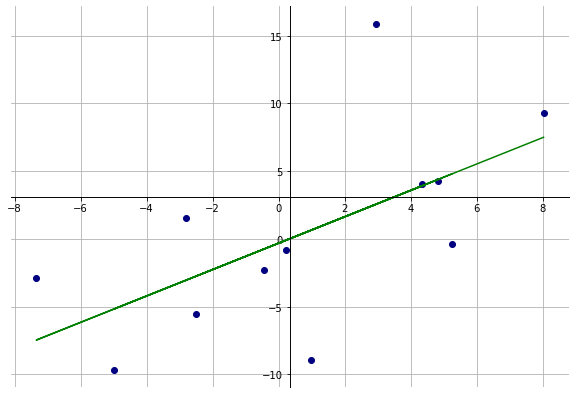

In [17]:
xs = pd.Series(x).values
line = LinearRegression()
line.fit(xs.reshape(-1,1),y)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.figure
ax.spines['bottom'].set_position(('axes', 0.5))
ax.spines['left'].set_position(('axes', 0.5))
ax.spines['top'].set_position(('axes', 0.5))
ax.spines['right'].set_position(('axes', 0.5))
ax.plot(xs, y, 'o', color = 'navy')
ax.plot(xs,line.predict(xs.reshape(-1,1)), color = 'green')
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['axes.grid'] = True 

In [18]:
print(line.coef_),print(line.intercept_)

[0.97418272]
-0.3165406452976848


(None, None)

In [27]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '29294',
'smlID': '205695',
'header': 'South Korea 1-Year Bond Yield Historical Data',
'st_date': '01/01/2011',
#'st_date': '11/18/2019',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
raw = req.post(url, headers = head, data = payload)
raw.status_code
soup = BeautifulSoup(raw.text)
riskfree = pd.read_html(str(soup.find('table')))[0]
#yraw1.to_excel(excel_writer=r'C:\Users\com\MSB535\data\대한항공주가.xlsx')
#13년 8월 주가정보 없음.

In [55]:
temp = riskfree['Change %'].to_list()
for i in range(len(temp)):
    temp[i] = float(temp[i].strip('%'))

In [56]:
np.mean(np.array(temp))

-0.49981481481481477